## Problem Definition — House Price Prediction

### Objective:
Predict the price of a house based on features such as location, size, number of rooms, area, condition, and other property-related characteristics.

### Problem Statement:
Build a regression model to accurately estimate house prices, helping buyers, sellers, and real estate agencies make data-driven pricing decisions and understand the key factors influencing property value.

### Approach:
- Clean and preprocess data (handle missing values, encode categorical features, remove outliers)
- Split into train/test sets
- Train single vs multiple feature Linear Regression models
- Evaluate using RMSE and R²
- Save the best-performing model

### Expected Outcome:
A reliable predictive model for estimating house prices and identifying the most important factors affecting property valuation.


you can download the Dataset from https://www.kaggle.com/datasets/hassanjameelahmed/house-prices-advanced-regression-dataset

##  Import Libraries

In [1]:
import os
os.chdir("C:\Datasets\House Price Perdiction")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib

##  Load Dataset

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##  Dataset Overview

In [4]:
print("Shape:", df.shape)
df.info()

Shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

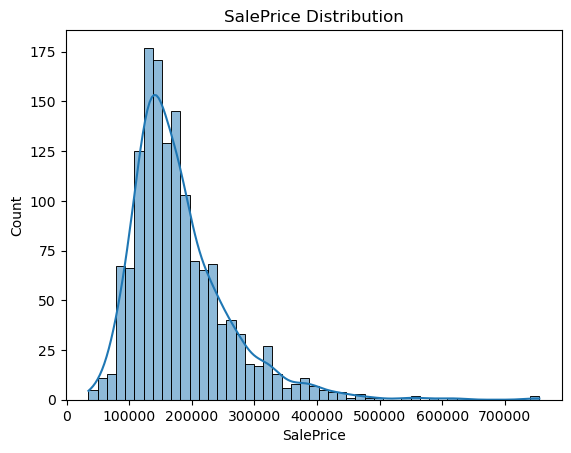

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()

#### SalePrice is right-skewed → log transformation may improve model performance.

In [8]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

#### Relationship Between Above-Ground Living Area and Sale Price

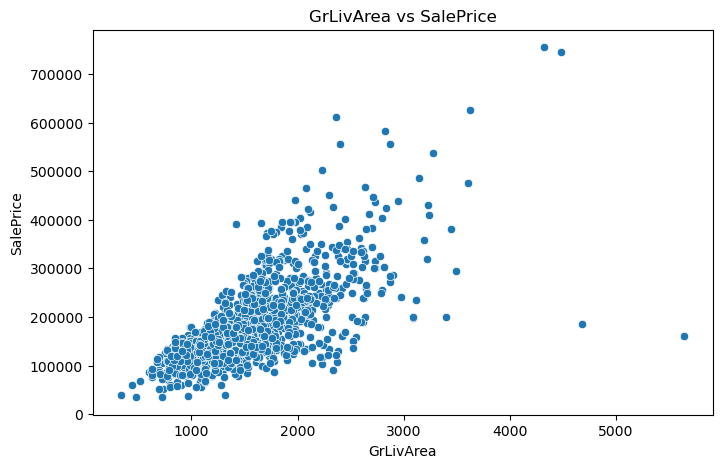

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("GrLivArea vs SalePrice")
plt.show()

#### Average Sale Price Across Neighborhoods

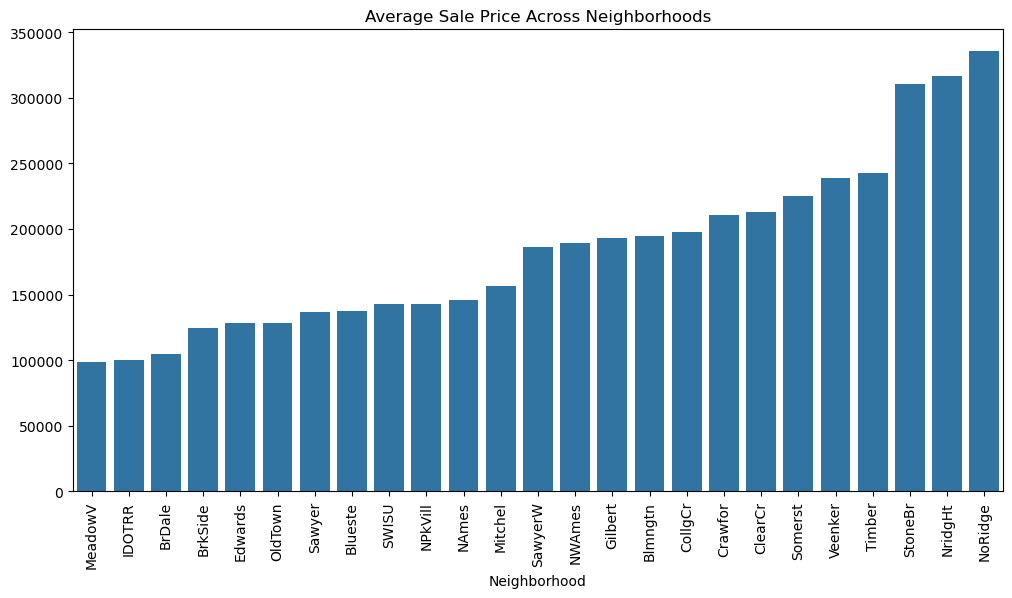

In [10]:
avg_neigh = df.groupby("Neighborhood")["SalePrice"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_neigh.index, y=avg_neigh.values)
plt.xticks(rotation=90)
plt.title("Average Sale Price Across Neighborhoods")
plt.show()

#### Top Correlated Features with Sale Price

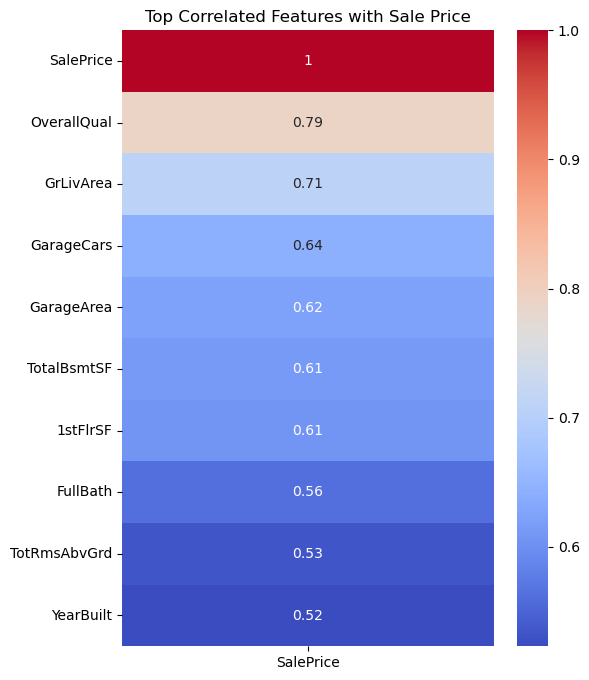

In [11]:
corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10)

plt.figure(figsize=(6,8))
sns.heatmap(top_corr.to_frame(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with Sale Price")
plt.show()

#### Average Sale Price Trend Over Years Sold

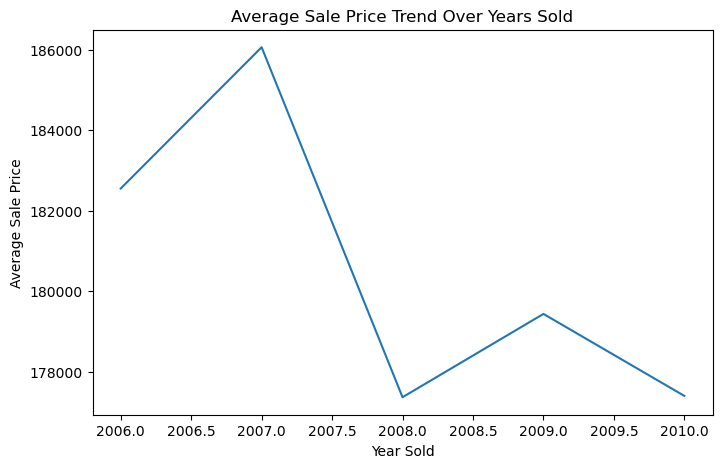

In [12]:
avg_year = df.groupby("YrSold")["SalePrice"].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=avg_year.index, y=avg_year.values)
plt.title("Average Sale Price Trend Over Years Sold")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.show()

#### Average Sale Price by Overall Quality

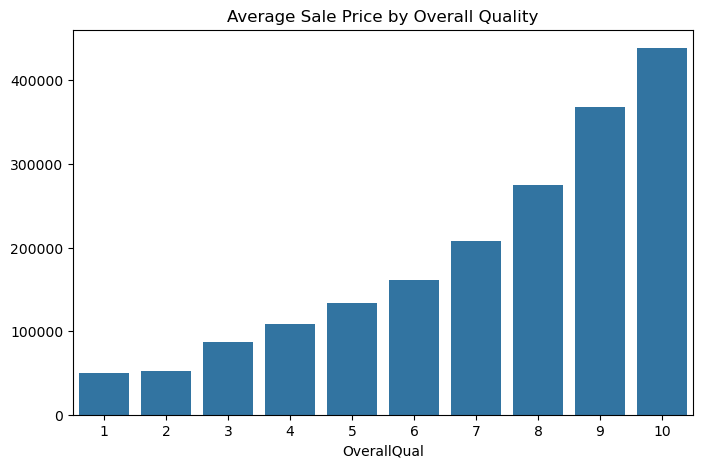

In [13]:
avg_price = df.groupby("OverallQual")["SalePrice"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Sale Price by Overall Quality")
plt.show()

##  Data Preprocessing

In [14]:
df["SalePrice"] = np.log1p(df["SalePrice"])

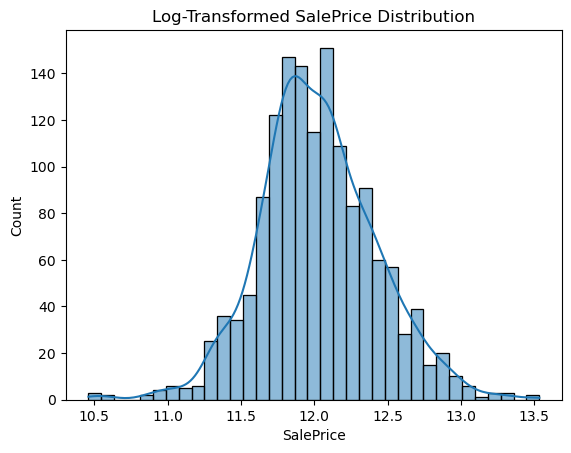

In [15]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.show()

In [16]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(10)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64

#### Drop High-Missing Columns (Baseline Simplification)

In [17]:
df = df.drop(columns=["Alley","FireplaceQu","MasVnrType", "PoolQC", "Fence", "MiscFeature","Id"])

#### Fill Numerical Missing Values With Median
##### We used Median instead of Mean because it is more resistant to outliers.

In [18]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [19]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('None')

#### Remove Outliers 

In [20]:
df = df[df["GrLivArea"] < 4000]

##  Feature Engineering & Splitting

- **TotalSF** = `TotalBsmtSF + 1stFlrSF + 2ndFlrSF`  
  Combines basement and floor areas to better capture total living space, improving model accuracy.

### Key Data Improvements

1️⃣ **Remove Outliers**  
- Extreme values can distort Linear Regression coefficients.  
- Applied before train-test split to stabilize predictions.

2️⃣ **Rare Categories Handling**  
- Group rare categorical levels (<10 occurrences) into `"Rare"`.  
- Reduces overfitting and improves generalization.  

3️⃣ **One-Hot Encoding**  
- Converts categorical features to numerical format.  
- `drop_first=True` used to avoid multicollinearity.

4️⃣ **Remove Multicollinearity**  
- Drop highly correlated features (correlation > 0.9).  
- Improves coefficient stability and interpretability.

5️⃣ **Standardization**  
- Scale numeric features to zero mean, unit variance.  
- Stabilizes training and prepares for regularized models (Ridge/Lasso).

**Summary:**  
These steps create a clean, well-prepared dataset that improves Linear Regression performance and makes coefficients meaningful.

In [21]:
df["TotalSF"] = (
    df["TotalBsmtSF"] +
    df["1stFlrSF"] +
    df["2ndFlrSF"]
)

In [22]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
threshold = 10
rare_dict = {}

for col in X_train.select_dtypes(include="object").columns:
    counts = X_train[col].value_counts()
    rare_categories = counts[counts < threshold].index
    rare_dict[col] = rare_categories

In [25]:
for col in rare_dict.keys():
    X_train[col] = X_train[col].replace(rare_dict[col], "Rare")
    X_test[col] = X_test[col].replace(rare_dict[col], "Rare")

In [26]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [27]:
corr_matrix = X_train.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

##  Model Development

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##  Model Evaluation

In [30]:
y_pred = model.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", round(r2, 4))

RMSE: 0.12333266478857112
R²: 0.9037


## Model Interpretation

In [32]:
feature_names = X_train.columns

coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df.head(10)

,Feature,Coefficient
129,BsmtCond_Rare,0.173562
59,Neighborhood_Crawfor,0.120989
98,Exterior1st_BrkFace,0.119691
176,SaleType_New,0.111384
74,Neighborhood_StoneBr,0.111339
172,GarageCond_Rare,0.104168
96,RoofMatl_Rare,0.092701
78,Condition1_Norm,0.092584
180,SaleCondition_Normal,0.085255
161,Functional_Typ,0.078764


## Save Model

In [33]:
joblib.dump(model, "house_price_model.pkl")

['house_price_model.pkl']

##  Example Predictions

In [34]:
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(rmse_actual)

20208.50558398791
